In [1]:
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
routes = [["Albuquerque","Atlanta"],
["Chicago","New York"],
["Chicago","Pinhais"],
["Curitiba","Atlanta"],
["Curitiba","Chicago"],
["Curitiba","Miami"],
["Curitiba","New York"],
["Curitiba","Sao Paulo"],
["Londrina","Foz"],
["Maringa","Albuquerque"],
["Maringa","Cleveland"],
["Miami","Denver"],
["Miami","New York"],
["Miami","Philadelphia"],
["Minneapolis","Foz"],
["New York","Cleveland"],
["New York","Minneapolis"],
["Philadelphia","Atlanta"],
["Phoenix","Cleveland"],
["Phoenix","Maringa"],
["Pinhais","Londrina"],
["Ponta Grossa","Cleveland"],
["Ponta Grossa","Foz"],
["Ponta Grossa","Londrina"],
["Sao Paulo","Boston"],
["Sao Paulo","Chicago"],
["Sao Paulo","Foz"],
["Sao Paulo","Londrina"],
["Sao Paulo","Minneapolis"],
["Sao Paulo","Ponta Grossa"],
["Tulsa","Maringa"],
["Tulsa","New York"]]

In [3]:
G = nx.Graph()

In [4]:
for route in routes:
    if not G.has_node(route[0]):
        G.add_node(route[0])
        
    if not G.has_node(route[1]):
        G.add_node(route[1])        
    G.add_edge(route[0], route[1])    
   

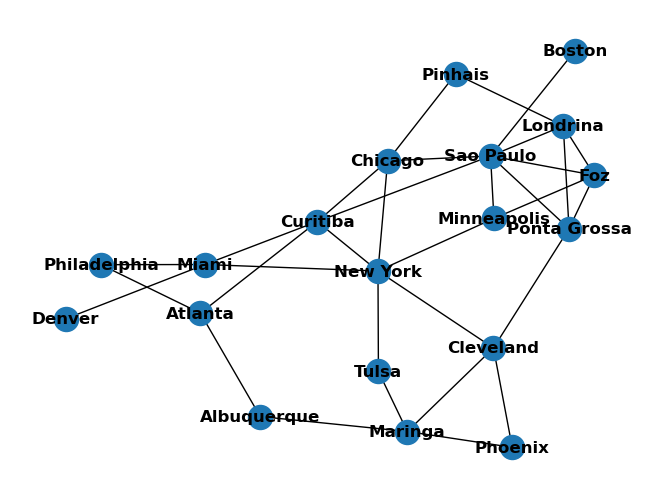

In [5]:
nx.draw(G, with_labels=True, font_weight='bold')

a) Qual é o número máximo de saltos que um passageiro pode fazer em uma única viagem entre
duas cidades atendidas?

In [6]:
diam = nx.diameter(G)

print(f'Número máximo de saltos: {diam}')

Número máximo de saltos: 4


b) Qual é o coeficiente de clusterização de Curitiba? E da rede geral?

In [7]:
G.nodes('Curitiba')

NodeDataView({'Albuquerque': None, 'Atlanta': None, 'Chicago': None, 'New York': None, 'Pinhais': None, 'Curitiba': None, 'Miami': None, 'Sao Paulo': None, 'Londrina': None, 'Foz': None, 'Maringa': None, 'Cleveland': None, 'Denver': None, 'Philadelphia': None, 'Minneapolis': None, 'Phoenix': None, 'Ponta Grossa': None, 'Boston': None, 'Tulsa': None}, data='Curitiba')

In [8]:
clustering_coef = nx.clustering(G)
cwb_coeff = clustering_coef['Curitiba']
print(f'Clustering coefficient de Curitiba é: {cwb_coeff}')    

Clustering coefficient de Curitiba é: 0.3


In [9]:
print(f'Coeficiente geral:{nx.average_clustering(G)}')

Coeficiente geral:0.23709273182957394


3- Estenda a rede criada na questão 1.

a) Adicione o atributo nos nós chamado Country, onde o valor se refere ao país onde cada cidade
está localizada.

In [10]:
G.nodes

NodeView(('Albuquerque', 'Atlanta', 'Chicago', 'New York', 'Pinhais', 'Curitiba', 'Miami', 'Sao Paulo', 'Londrina', 'Foz', 'Maringa', 'Cleveland', 'Denver', 'Philadelphia', 'Minneapolis', 'Phoenix', 'Ponta Grossa', 'Boston', 'Tulsa'))

In [12]:
G.nodes['Albuquerque']['country'] = 'USA'
G.nodes['Atlanta']['country'] = 'USA'
G.nodes['Chicago']['country'] = 'USA'
G.nodes['New York']['country'] = 'USA'
G.nodes['Pinhais']['country'] = 'Brasil'
G.nodes['Curitiba']['country'] = 'Brasil'
G.nodes['Miami']['country'] = 'USA'
G.nodes['Sao Paulo']['country'] = 'Brasil'
G.nodes['Londrina']['country'] = 'Brasil'
G.nodes['Foz']['country'] = 'Brasil'
G.nodes['Maringa']['country'] = 'Brasil'
G.nodes['Cleveland']['country'] = 'USA'
G.nodes['Denver']['country'] = 'USA'
G.nodes['Philadelphia']['country'] = 'USA'
G.nodes['Minneapolis']['country'] = 'USA'
G.nodes['Phoenix']['country'] = 'USA'
G.nodes['Ponta Grossa']['country'] = 'Brasil'
G.nodes['Boston']['country'] = 'USA'
G.nodes['Tulsa']['country'] = 'USA'

b) Adicione o atributo nas arestas chamado Cost. Se uma arestas representa um voo internacional
esse valor deve ser 5, se ela representa um voo nacional o valor deve ser 1.

In [13]:
for edge in G.edges:
    print(edge)
    if G.nodes[edge[0]]['country'] == G.nodes[edge[1]]['country']:
        G.edges[edge[0], edge[1]]['cost'] = 1
    else:
        G.edges[edge[0], edge[1]]['cost'] = 5       


('Albuquerque', 'Atlanta')
('Albuquerque', 'Maringa')
('Atlanta', 'Curitiba')
('Atlanta', 'Philadelphia')
('Chicago', 'New York')
('Chicago', 'Pinhais')
('Chicago', 'Curitiba')
('Chicago', 'Sao Paulo')
('New York', 'Curitiba')
('New York', 'Miami')
('New York', 'Cleveland')
('New York', 'Minneapolis')
('New York', 'Tulsa')
('Pinhais', 'Londrina')
('Curitiba', 'Miami')
('Curitiba', 'Sao Paulo')
('Miami', 'Denver')
('Miami', 'Philadelphia')
('Sao Paulo', 'Boston')
('Sao Paulo', 'Foz')
('Sao Paulo', 'Londrina')
('Sao Paulo', 'Minneapolis')
('Sao Paulo', 'Ponta Grossa')
('Londrina', 'Foz')
('Londrina', 'Ponta Grossa')
('Foz', 'Minneapolis')
('Foz', 'Ponta Grossa')
('Maringa', 'Cleveland')
('Maringa', 'Phoenix')
('Maringa', 'Tulsa')
('Cleveland', 'Phoenix')
('Cleveland', 'Ponta Grossa')


4 – Exporte a rede final criada na questão 3 no formato .GML. Confira se todas as informações
pedidas anteriormente estão disponíveis nesse arquivo.

In [60]:
nx.write_gml(G, "redeExemplo.gml")

# Visualização no gephi:

![alt text](gephi.png "rede de rotas para exercício 1")